In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

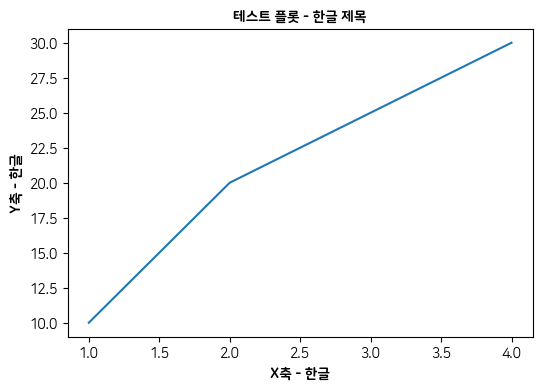

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf' 

# 폰트 설정
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()

# 한글 테스트를 위한 간단한 플롯
plt.figure(figsize=(6, 4))
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.title('테스트 플롯 - 한글 제목', fontproperties=fontprop)
plt.xlabel('X축 - 한글', fontproperties=fontprop)
plt.ylabel('Y축 - 한글', fontproperties=fontprop)
plt.show()

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/hotel_review_75000.csv', encoding='utf-8')

In [4]:
data

,Unnamed: 0.1,Unnamed: 0,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,0,356,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,1,357,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True
2,2,358,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True
3,3,359,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,True
4,4,360,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,True
...,...,...,...,...,...,...,...,...,...,...
74995,74995,223914,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,1박 로맨틱 여행,2019년 8월 17일,10.0,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...,True
74996,74996,223915,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,2박 로맨틱 여행,2018년 11월 30일,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...,True
74997,74997,223916,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),family,1박 가족 여행,2019년 12월 4일,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...,True
74998,74998,223917,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),other,1박 여행,2019년 5월 2일,8.0,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...,True


In [5]:
#쓸데없는 단어 스탑워즈로 모아놓은 것- 이를 제외하고 분석하는 것
stopwards = stopwords = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/%ED%95%9C%EA%B5%AD%EC%96%B4%EB%B6%88%EC%9A%A9%EC%96%B4100.txt', encoding='utf-8')

In [6]:
stopwards.head()

,이
0,있
1,하
2,것
3,들
4,그


In [7]:
#긍정리뷰인지 부정리뷰인지 워드 클라우드
#나이브베이즈 이용해 맞추는 것

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  75000 non-null  int64  
 1   Unnamed: 0    75000 non-null  int64  
 2   hotelId       75000 non-null  int64  
 3   hotelName     75000 non-null  object 
 4   tripType      75000 non-null  object 
 5   tripTypeText  75000 non-null  object 
 6   reviewDate    75000 non-null  object 
 7   rating        75000 non-null  float64
 8   description   75000 non-null  object 
 9   isKorNot      75000 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 5.2+ MB


In [9]:
data['description_len'] = data['description'].apply(len)

In [10]:
data

,Unnamed: 0.1,Unnamed: 0,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot,description_len
0,0,356,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True,56
1,1,357,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True,55
2,2,358,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True,91
3,3,359,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,True,13
4,4,360,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,True,112
...,...,...,...,...,...,...,...,...,...,...,...
74995,74995,223914,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,1박 로맨틱 여행,2019년 8월 17일,10.0,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...,True,164
74996,74996,223915,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,2박 로맨틱 여행,2018년 11월 30일,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...,True,55
74997,74997,223916,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),family,1박 가족 여행,2019년 12월 4일,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...,True,52
74998,74998,223917,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),other,1박 여행,2019년 5월 2일,8.0,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...,True,72


In [11]:
data['description'][:10]

0    직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1    웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2    서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3                                        가격에 맞게 만족했습니다
4    처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...
5    서비스 최고였어요수영장만 말고 사우나도 같이 이용할수있었으면 다만 토요일 오후에 집...
6                        최고의 위치 좋은 서비스 관리 잘 된 시설 아주 만족
7                     명동 가깝고 이그제큐티브룸 서비스도 좋고 깨끗하고 친절해요
8       위치도 좋았고 룸컨디션이 너무 좋았어요특히 조식부폐는 음식퀄리티가 굉장히 훌륭했어요
9    중심가라 새벽에도 차량소음이 들린다는 점 히터때문에 객실이 좀 건조한 편이라는 점을...
Name: description, dtype: object

<Axes: xlabel='description_len', ylabel='Count'>

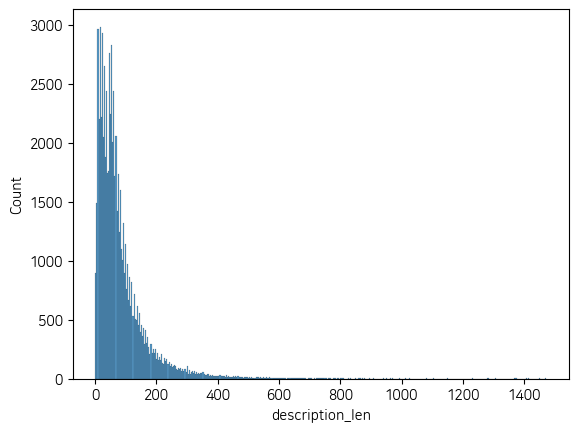

In [12]:
sns.histplot(data['description_len'])

In [13]:
# !pip install nltk

In [14]:
def remove_stopwards(x):
    cleaned = []
    x = x.lower()
    for i in x.split():
        if i not in stopwards:
            cleaned.append(i)
    cleaned = " ".join(cleaned)
    
    return cleaned

In [15]:
data['description'] = data['description'].apply(remove_stopwards)
data['description'][:10]

0    직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1    웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2    서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3                                        가격에 맞게 만족했습니다
4    처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...
5    서비스 최고였어요수영장만 말고 사우나도 같이 이용할수있었으면 다만 토요일 오후에 집...
6                        최고의 위치 좋은 서비스 관리 잘 된 시설 아주 만족
7                     명동 가깝고 이그제큐티브룸 서비스도 좋고 깨끗하고 친절해요
8       위치도 좋았고 룸컨디션이 너무 좋았어요특히 조식부폐는 음식퀄리티가 굉장히 훌륭했어요
9    중심가라 새벽에도 차량소음이 들린다는 점 히터때문에 객실이 좀 건조한 편이라는 점을...
Name: description, dtype: object

In [50]:
X = data[['description']]
y= data['rating']

In [51]:
X

,description
0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3,가격에 맞게 만족했습니다
4,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...
...,...
74995,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가고...
74996,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...
74997,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...
74998,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...


In [52]:
y

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
74995    10.0
74996     8.0
74997     8.0
74998     8.0
74999     6.0
Name: rating, Length: 75000, dtype: float64

In [53]:
y.describe()

count    75000.000000
mean         8.167813
std          2.199348
min          2.000000
25%          8.000000
50%          8.000000
75%         10.000000
max         10.000000
Name: rating, dtype: float64

# 자주 등장하는 단어 빈도 분석

In [20]:
whole_words = []
for words in data['description']:
    for word in words.split():
        whole_words.append(word)

In [21]:
len(whole_words)

1418413

In [22]:
# 리스트를 하나의 문자열로 결합
whole_text = ' '.join(whole_words)

In [23]:
from nltk.probability import FreqDist

In [24]:
FreqDist(whole_words)

FreqDist({'너무': 13918, '잘': 8725, '좋았습니다': 8114, '좀': 7608, '깨끗하고': 7594, '있어서': 5728, '수': 5698, '매우': 5617, '좋았어요': 5335, '호텔': 5193, ...})

<Axes: xlabel='Samples', ylabel='Counts'>

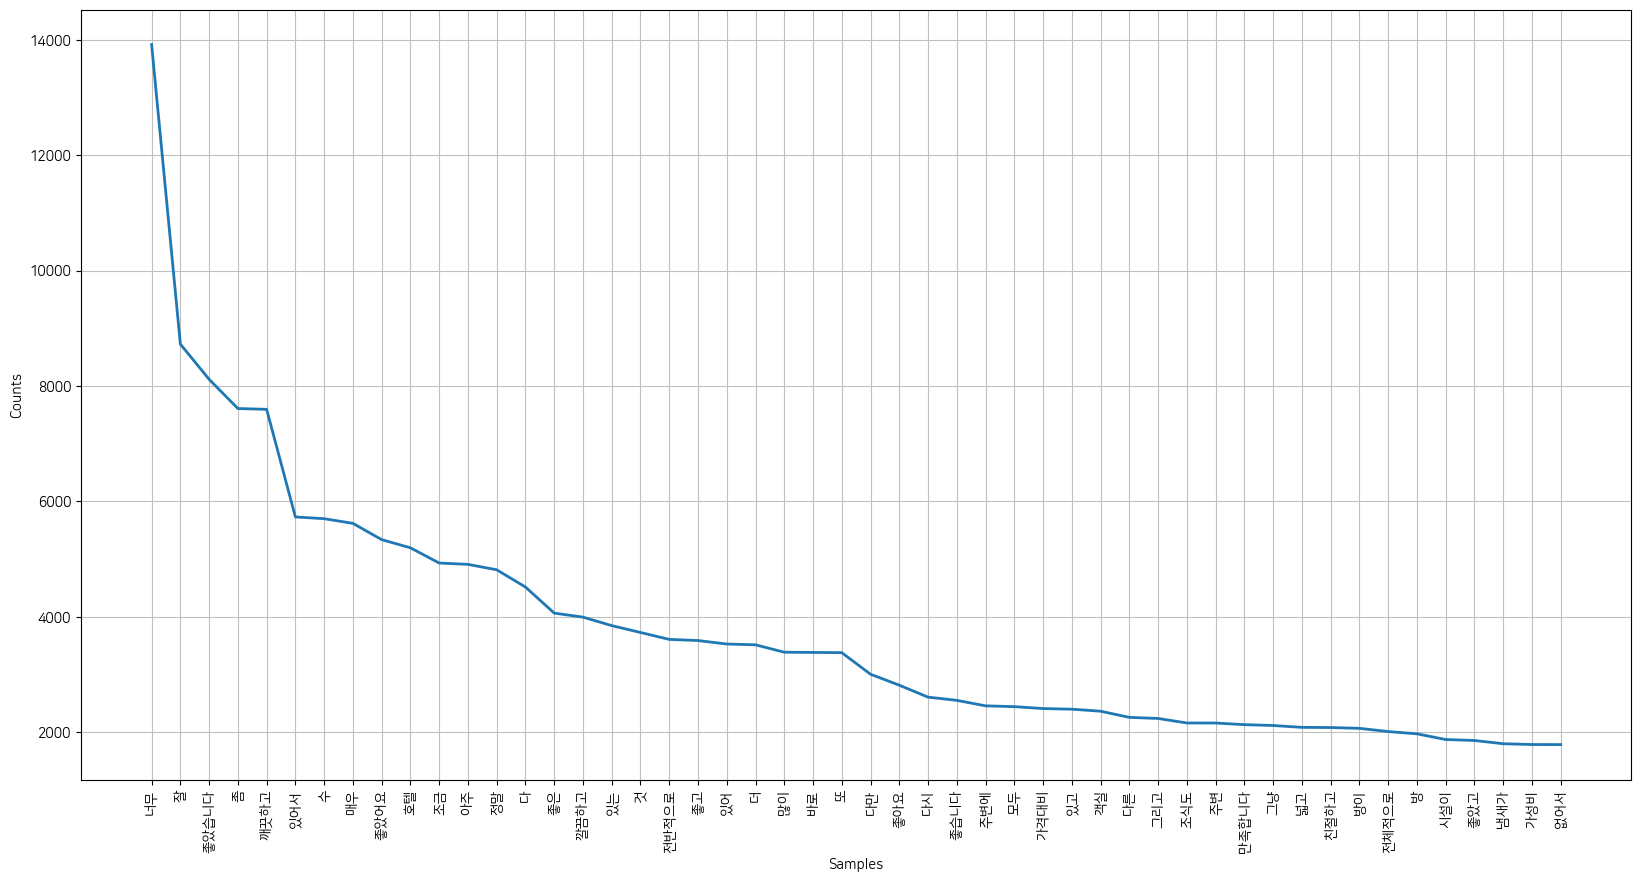

In [25]:
plt.figure(figsize=(20,10))
FreqDist(whole_words).plot(50)

# Word Could 만들기

In [26]:
!pip install wordcloud

In [27]:
from wordcloud import WordCloud

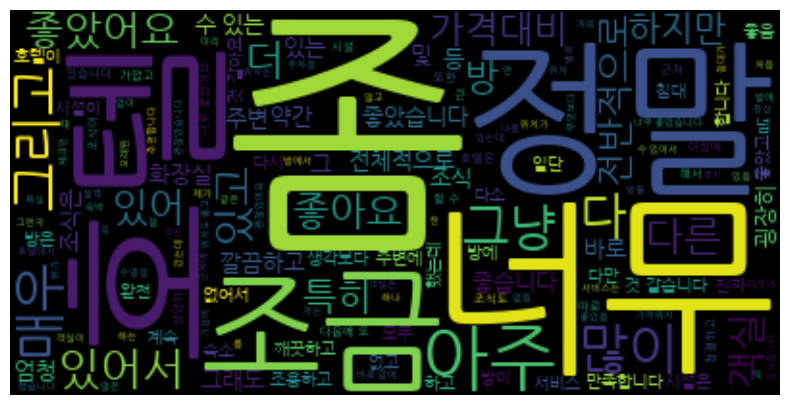

In [28]:
# WordCloud 생성 (폰트 경로는 필요한 경우 설정)
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(whole_text)

# WordCloud 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
data2 = pd.concat([X, y], axis=1)
data2

,description,rating
0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,10.0
1,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,10.0
2,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,10.0
3,가격에 맞게 만족했습니다,10.0
4,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,10.0
...,...,...
74995,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가고...,10.0
74996,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...,8.0
74997,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...,8.0
74998,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...,8.0


In [30]:
good = data2.loc[data2['rating'] >= 8, 'description'] 
good.head()

0    직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1    웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2    서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3                                        가격에 맞게 만족했습니다
4    처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...
Name: description, dtype: object

In [31]:
bad = data2.loc[data2['rating'] < 8, 'description'] 
bad.head()

15    가성비 별로였습니다 기대를 많이 했기에 실망도 컸다고 봅니다 예약하고 사전에 메일을...
30    4번째 호텔을 방문하는 것이었습니다 예전에 너무 좋아하는 호텔이었는데 이번엔 실망이...
35                                서비스 친절도가 프로답지않은 느낌입니다
41    보통 이뷰 남기지 않는데 처음으로 남겨봅니다 국내외 특급호텔 많이 다녀봤는데 곳은 ...
43    고객을 편안히개 만드는 법을 잘 아는 호텔입니다 오랜 역사가 과연 명불허전 종업원 ...
Name: description, dtype: object

In [32]:
good_text = " ".join(list(good))
len(good_text)

4476869

In [34]:
bad_text = " ".join(list(bad))
len(bad_text)

1917436

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

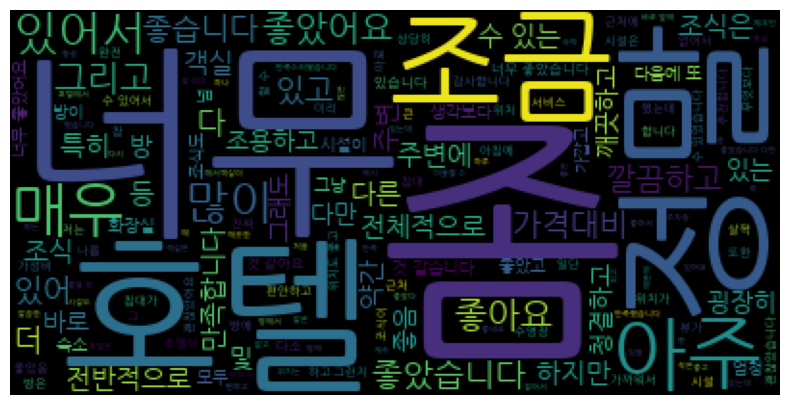

In [35]:
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(good_text)
# wc = WordCloud(stopwords= ['place', 'get', 'great', 'good'], max_words=2000, random_state=200).generate(good_text)
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

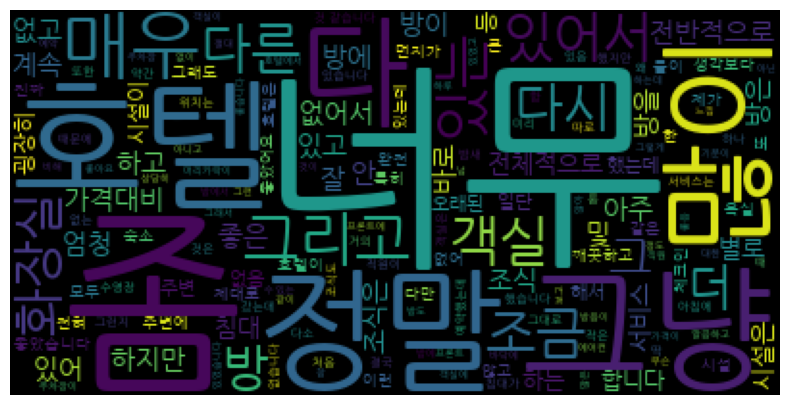

In [43]:
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(bad_text)
# wc = WordCloud(stopwords= ['place', 'get', 'great', 'good'], max_words=2000, random_state=200).generate(good_text)
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')

# 나이브 베이즈를 이용해서 감성분석 하기
## text를 벡터화 하기 CountVectorizer
* 단어의 빈도를 세고 숫자로 변형

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
cv = CountVectorizer()
X_vec = cv.fit_transform(good)
X_vec

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 909771 stored elements and shape (58386, 182518)>

In [60]:
for i in X_vec[:1]:
    print(i)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 14 stored elements and shape (1, 182518)>
  Coords	Values
  (0, 149222)	1
  (0, 83119)	1
  (0, 52396)	1
  (0, 114778)	1
  (0, 38768)	1
  (0, 35675)	1
  (0, 92291)	1
  (0, 138436)	1
  (0, 50037)	1
  (0, 177316)	1
  (0, 121053)	1
  (0, 77743)	1
  (0, 104340)	1
  (0, 73850)	1


In [61]:
y = data2.loc[data2['rating'] >= 8, 'rating'].values

In [62]:
from sklearn.model_selection import train_test_split

In [66]:
# X와 y의 길이가 같아야 합니다. 확인 후 일치하지 않으면 수정
X_train, X_valid, y_train, y_valid = train_test_split(X_vec, y, test_size=0.4, random_state=7)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=7)

In [67]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [68]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred = mnb.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.6800548085980989
              precision    recall  f1-score   support

         8.0       0.68      0.47      0.56      5004
        10.0       0.68      0.84      0.75      6673

    accuracy                           0.68     11677
   macro avg       0.68      0.65      0.65     11677
weighted avg       0.68      0.68      0.67     11677



In [69]:
test_pred = mnb.predict(X_test)
print(accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))

0.6953245418736085
              precision    recall  f1-score   support

         8.0       0.68      0.49      0.57      4798
        10.0       0.70      0.84      0.76      6880

    accuracy                           0.70     11678
   macro avg       0.69      0.66      0.67     11678
weighted avg       0.69      0.70      0.68     11678

